Importo  librerías necesarias para Clasificación Random Forest

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Importo el data frame depurado

In [24]:
ruta = 'D:/OneDrive/Documentos/Posgrados/diplomado_cs_atos/trabajo_final/data_salarios_mod.csv'
df_salarios = pd.read_csv(ruta)
print(df_salarios.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729 entries, 0 to 3728
Data columns (total 53 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   work_year                                                    3729 non-null   int64 
 1   employment_type                                              3729 non-null   object
 2   job_title                                                    3729 non-null   object
 3   salary                                                       3729 non-null   int64 
 4   salary_currency                                              3729 non-null   object
 5   salary_in_usd                                                3729 non-null   int64 
 6   employee_residence                                           3729 non-null   object
 7   remote_ratio                                                 3729 non-null   int64 
 8 

In [25]:
# Muestreo con reemplazo
print(df_salarios.sample(frac=2/3, replace=True))

      work_year employment_type              job_title  salary  \
507        2023              FT           Data Analyst   56100   
2508       2022              FT         Data Scientist  191475   
3327       2021              FT     Research Scientist   80000   
951        2023              FT         Data Scientist  225000   
1578       2023              FT  Data Science Engineer  100000   
...         ...             ...                    ...     ...   
876        2023              FT           Data Analyst  106800   
2586       2022              FT           Data Analyst   97500   
734        2023              FT   Data Science Manager  245100   
2912       2022              FT          Data Engineer  180000   
2762       2022              FT          Data Engineer  170000   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
507              USD          56100                 US           100   
2508             USD         191475                 US         

Aleatoridad

In [26]:
from random import sample
df_salarios.columns[:]

Index(['work_year', 'employment_type', 'job_title', 'salary',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'name_c',
       'region_c', 'name_e', 'region_e', 'salary_in_usd_160hs',
       'sub-region_e_Australia and New Zealand', 'sub-region_e_Central Asia',
       'sub-region_e_Eastern Asia', 'sub-region_e_Eastern Europe',
       'sub-region_e_Latin America and the Caribbean',
       'sub-region_e_Northern Africa', 'sub-region_e_Northern America',
       'sub-region_e_Northern Europe', 'sub-region_e_Polynesia',
       'sub-region_e_South-eastern Asia', 'sub-region_e_Southern Asia',
       'sub-region_e_Southern Europe', 'sub-region_e_Sub-Saharan Africa',
       'sub-region_e_Western Asia', 'sub-region_e_Western Europe',
       'sub-region_c_Australia and New Zealand', 'sub-region_c_Eastern Asia',
       'sub-region_c_Eastern Europe',
       'sub-region_c_Latin America and the Caribbean',
       'sub-region_

importamos la librería sklearn para obtener el clasificador Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [35]:
#Defino cuales columnas pertenecen a las que se tienen que analizar y cuales son las que se quiere predecir
#Y la cantidad de salidas que tiene que tener la red tiene que ser igual a las variables de salidas

columnas_x = ['remote_ratio', 'salary_in_usd_160hs', 'experience_level_EN', 'experience_level_EX', 'experience_level_MI',
              'experience_level_SE', 'sub-region_c_Australia and New Zealand', 'sub-region_c_Eastern Asia',
              'sub-region_c_Latin America and the Caribbean', 'sub-region_c_Northern Africa', 'sub-region_c_Northern America',
              'sub-region_c_Northern Europe', 'sub-region_c_Polynesia', 'sub-region_c_South-eastern Asia',
              'sub-region_c_Southern Asia', 'sub-region_c_Southern Europe', 'sub-region_c_Sub-Saharan Africa',
              'sub-region_c_Western Asia', 'sub-region_c_Western Europe', 'general_job_title_Analista de Datos y Business Intelligence',
              'general_job_title_Científico de Datos y Machine Learning', 'general_job_title_Científico e Investigación',
              'general_job_title_Gestión y Liderazgo', 'general_job_title_Ingeniería de Datos y Big Data']

columnas_y = ['sub-region_e_Australia and New Zealand', 'sub-region_e_Central Asia', 'sub-region_e_Eastern Asia',
              'sub-region_e_Eastern Europe', 'sub-region_e_Latin America and the Caribbean', 'sub-region_e_Northern Africa',
              'sub-region_e_Northern America', 'sub-region_e_Northern Europe', 'sub-region_e_Polynesia', 'sub-region_e_South-eastern Asia',
              'sub-region_e_Southern Asia', 'sub-region_e_Southern Europe', 'sub-region_e_Sub-Saharan Africa', 'sub-region_e_Western Asia',
              'sub-region_e_Western Europe']

In [36]:
# Acá quedan los datos divididos por los que se usan para predecir y las que se quiere predecir.
X = df_salarios[columnas_x]
y = df_salarios[columnas_y]

In [69]:
#Separamos el conjunto de datos en entrenamiento (train) y los de testeo (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [83]:
clas_r_forest = RandomForestClassifier( n_estimators=20,
                                        max_depth=5,
                                        criterion="entropy",
                                        max_features="sqrt",
                                        max_samples=2/3,
                                        bootstrap=True,
                                         oob_score=True)
clas_r_forest.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=5,
                       max_samples=0.6666666666666666, n_estimators=20,
                       oob_score=True)

In [84]:
#Calculamos scores
y_pred = clas_r_forest.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.2%}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.2%}')

Accuracy: 92.23%
Precision: 95.52%
Recall: 92.23%


c:\Users\gasto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gasto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
profundidad_arboles = clas_r_forest.estimators_[0].tree_.max_depth
print("Profundidad máxima de los árboles:", profundidad_arboles)

Profundidad máxima de los árboles: 3


In [76]:
# Definir los rangos para n_estimators y max_depth
n_estimators_range = list(range(20, 101, 10))
max_depth_range = list(range(3, 10))

# Inicializar listas para almacenar los resultados
n_estimators_list = []
max_depth_list = []
accuracy_list = []

# Iterar sobre los valores de n_estimators y max_depth
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        # Crear el clasificador con los valores actuales de n_estimators y max_depth
        clas_r_forest = RandomForestClassifier(n_estimators=n_estimators,
                                               max_depth=max_depth,
                                               criterion="entropy",
                                               max_features="sqrt",
                                               max_samples=2/3,
                                               bootstrap=True,
                                               oob_score=True)
        clas_r_forest.fit(X_train, y_train)
        y_pred = clas_r_forest.predict(X_test)
        
        # Calcular accuracy_score
        accuracy = accuracy_score(y_test, y_pred)
        
        # Guardar los valores en las listas
        n_estimators_list.append(n_estimators)
        max_depth_list.append(max_depth)
        accuracy_list.append(accuracy)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'n_estimators': n_estimators_list,
    'max_depth': max_depth_list,
    'accuracy_score': accuracy_list
})

# Encontrar la fila con el mejor accuracy_score
best_params = results_df.loc[results_df['accuracy_score'].idxmax()]

print("Mejor combinación de hiperparámetros:")
print(best_params)

c:\Users\gasto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Mejor combinación de hiperparámetros:
n_estimators      70.000000
max_depth          8.000000
accuracy_score     0.955317
Name: 40, dtype: float64


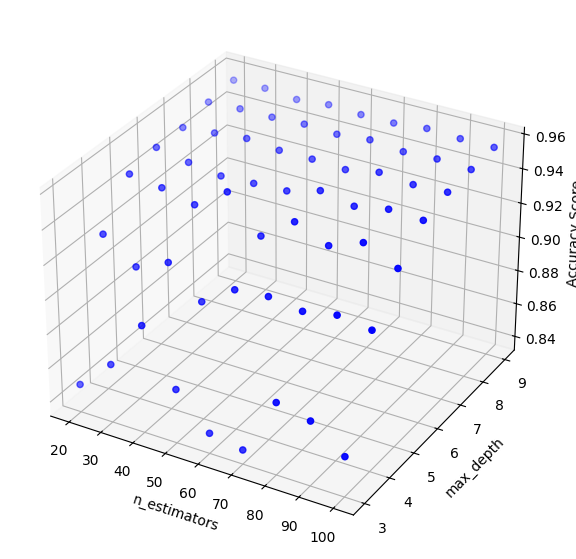

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extraer los valores de n_estimators, max_depth y accuracy_score del DataFrame
n_estimators = results_df['n_estimators']
max_depth = results_df['max_depth']
accuracy = results_df['accuracy_score']

# Graficar los puntos tridimensionales
ax.scatter(n_estimators, max_depth, accuracy, c='b', marker='o')

# Etiquetas de los ejes
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('Accuracy Score')

# Mostrar la gráfica
plt.show()

In [79]:
import seaborn as sns

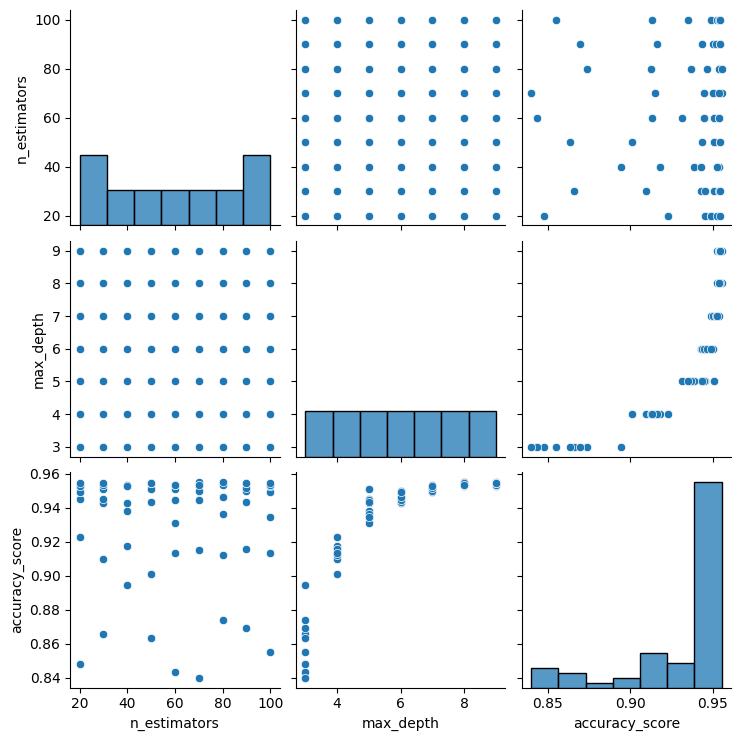

In [82]:
sns.pairplot(results_df)